In [99]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [100]:
# Import Data
data = pd.read_excel('/Users/talhajamal/Desktop/Code/Regression_Analysis/data/data_coursework_Q1.xls')

# Drop certain columns and rows
data = data.iloc[3:, 0:8]
data.drop(['Unnamed: 0', 'Unnamed: 5'], axis=1, inplace=True)
data.columns = ['Year', 'Month', 'Date', '1M T-bill', 'SP500', 'IBM']
data = data[['Date', 'Year', 'Month', '1M T-bill', 'SP500', 'IBM']]
data.dropna(inplace=True)
data.reset_index(inplace=True)

,Unnamed: 0,year_,month_,date_,1-month Tbill,Unnamed: 5,SP500,IBM,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Note: the 1-month T-bill is multiplied,Unnamed: 13,Unnamed: 14
0,NaN,1960,1,JAN 1960,0.33,NaN,58.03,adjusted,,by 100,and is,not,expressed,in yearly,basis
1,NaN,1960,2,FEB 1960,0.29,NaN,55.78,closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1960,3,MAR 1960,0.35,NaN,55.02,pirce,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1960,4,APR 1960,0.19,NaN,55.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1960,5,MAY 1960,0.27,NaN,55.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Generate Features for Simple CAPM Regression
data['Rf'] = data['1M T-bill'] / 100
data['Ri'] = (data['IBM'] / data['IBM'].shift(1)) - 1
data['Rm'] = (data['SP500'] / data['SP500'].shift(1)) - 1
data['Excess Return'] = data['Ri'] - data['Rf']
data['Market Excess Return'] = data['Rm'] - data['Rf']
data.dropna(inplace=True)
data.head()

,index,Date,Year,Month,1M T-bill,SP500,IBM,Rf,Ri,Rm,Excess Return,Market Excess Return
1,25,FEB 1962,1962,2,0.20,70.22,2.66,0.0020,-0.011152,0.016650,-0.013152,0.014650
2,26,MAR 1962,1962,3,0.20,70.29,2.64,0.0020,-0.007519,0.000997,-0.009519,-0.001003
3,27,APR 1962,1962,4,0.22,68.05,2.25,0.0022,-0.147727,-0.031868,-0.149927,-0.034068
4,28,MAY 1962,1962,5,0.24,62.99,1.95,0.0024,-0.133333,-0.074357,-0.135733,-0.076757
5,29,JUN 1962,1962,6,0.20,55.63,1.68,0.0020,-0.138462,-0.116844,-0.140462,-0.118844


In [103]:
# Do a 80-20 split of data for training and testing the CAPM Model
train = data[ :277]
test = data[ 277:]

X_train = train[['Market Excess Return']] # Train features must be 2D
Y_train = train['Excess Return'] # Target feature must be 1D

X_test = test[['Market Excess Return']]
Y_test = test['Excess Return']

In [104]:
# Run Simple CAPM Model
simple_capm = LinearRegression()
simple_capm.fit(X_train, Y_train)

# Generate Predictions
Y_pred = simple_capm.predict(X_test)

LinearRegression()

In [106]:
# Simple CAPM Results
# Coefficient and Intercept
print(f"Coefficient: {simple_capm.coef_[0]}")
print(f"Intercept: {simple_capm.intercept_}")

# Scoring the model (R^2 Score)
r2_score = simple_capm.score(X_test, Y_test)
print(f"R^2 Score: {r2_score}")

Coefficient: 0.8778816688364846
Intercept: 0.004965732301800065
R^2 Score: 0.28704873559643507


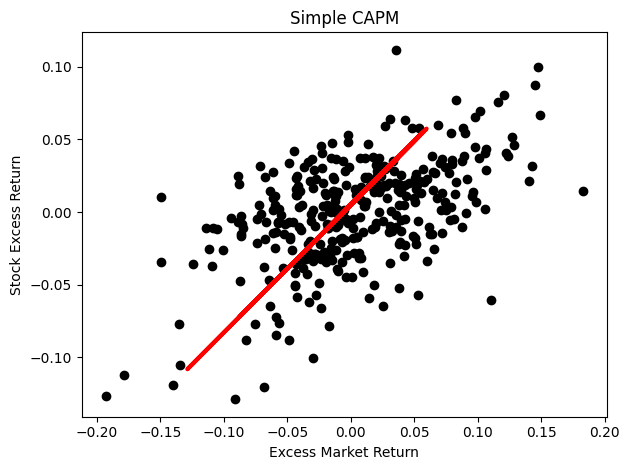

In [107]:
# Plotting the results
plt.scatter(data['Excess Return'], data['Market Excess Return'], color='black')
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.xlabel('Excess Market Return')
plt.ylabel('Stock Excess Return')
plt.title('Simple CAPM')
plt.tight_layout()
plt.show()

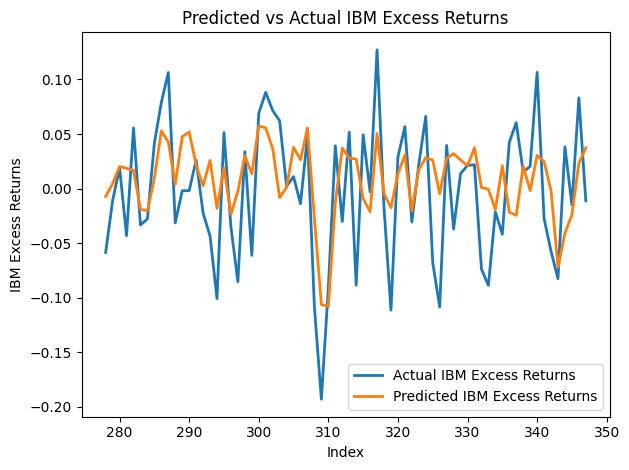

In [119]:
# Plotting Prediction and Actual Values
plt.plot(Y_test.index, Y_test, label='Actual IBM Excess Returns', linewidth=2)
plt.plot(Y_test.index, Y_pred, label='Predicted IBM Excess Returns', linewidth=2)
plt.xlabel('Index')
plt.ylabel('IBM Excess Returns')
plt.title('Predicted vs Actual IBM Excess Returns')
plt.legend()
plt.tight_layout()
plt.show()